In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
%matplotlib inline

In [128]:
from rioniso.model import *
from rioniso.importdata import ImportData

In [18]:
exp_data_file = '/home/duskdawn/Downloads/72Ge-10-11s-2to21-2nd.npz'
simulated_data_file = '/home/duskdawn/analysis/72Ge/segundo-set-2023/72ge-2nd-off-isocurveinfo.ods'

In [372]:
imported_data = ImportData(simulated_data_file, exp_data_file, 10)

In [338]:
iso_data = calculate_iso_inputs(imported_data.simulated_data, 
                                imported_data.experimental_data, xspan=6e3)

In [339]:
auxX = np.delete([float(freq) for freq in iso_data[:, 1]], [20])
auxY = np.delete([float(sigma) for sigma in iso_data[:, 3]], [20])
auxYe = np.delete([float(sigmae) for sigmae in iso_data[:, 4]], [20])

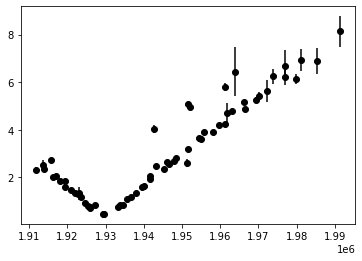

In [350]:
plt.errorbar(auxX, auxY, yerr=auxYe, color = 'black', fmt = 'o')
plt.show()

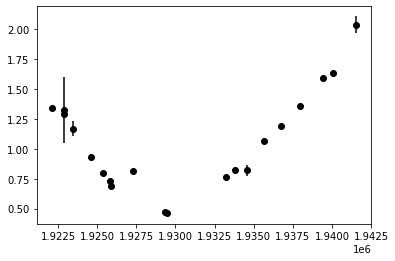

In [340]:
plt.errorbar(auxX[10:30], auxY[10:30], yerr=auxYe[10:30], color = 'black', fmt = 'o')
plt.show()

In [342]:
def fit_iso_curve_f2(f, sigma, errors = None, seeds = [1.395, 1e-4, 0.1]):#T and sT in ps
    try:
        if errors is not None:
            fit_params, fit_covariance = curve_fit(iso_curve_f2, f, sigma, p0=seeds,
                                            sigma=errors, absolute_sigma=True)
        else: 
            fit_params, fit_covariance = curve_fit(iso_curve_f2, f, sigma, p0=seeds)
        return fit_params, np.sqrt(np.diag(fit_covariance))

    except RuntimeError:
        pass

def iso_curve_f2(revf, gammat, dp_p, sys, path = 108.36):
    return np.sqrt((((1-(path/c*revf)**2-1/(gammat**2))*dp_p*revf)**2+sys**2))

In [343]:
fit_params, err = fit_iso_curve_f2(auxX[10:30], auxY[10:30],# errors= auxYe[10:30],
                                 seeds= [1.3956, 1e-4, 0.4])

In [357]:
fit_params, err

(array([1.39566887e+00, 1.66372615e-04, 4.69702571e-01]),
 array([9.23158366e-05, 4.06427362e-06, 4.22409229e-02]))

In [367]:
axx = 

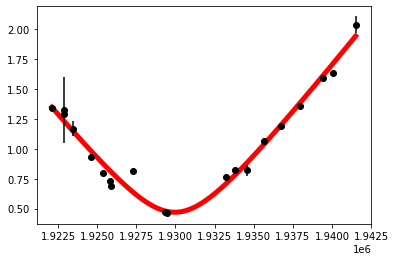

In [368]:
plt.plot(axx, iso_curve_f2(axx, *fit_params), 'r-',  linewidth=5)
plt.errorbar(auxX[10:30], auxY[10:30], yerr=auxYe[10:30], color = 'black', fmt = 'o')

plt.show()